In [ ]:
#điều chỉnh động cơ DC( nhiệt độ , độ ẩm , lưu lượng,mức)
#nhiệt độ:input(setpoint[18-30],giá trị cảm biến[-5,60]):output(pwm[0-255])


In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a44c569c6427759fe704ef5d22a1508a6ae47c9bed42fd6d284a06db8b124b1a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-16-e8b169755831>:66: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-16-e8b169755831>:67: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-16-e8b169755831>:68: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


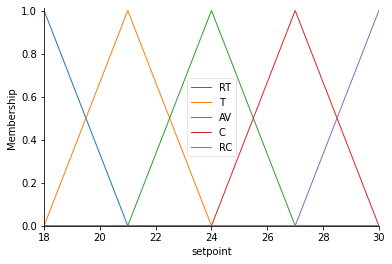

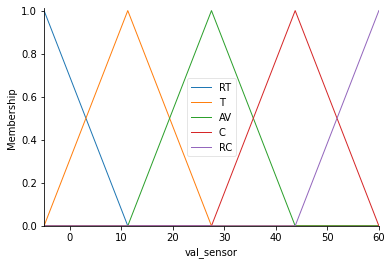

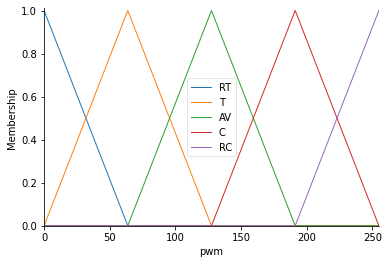

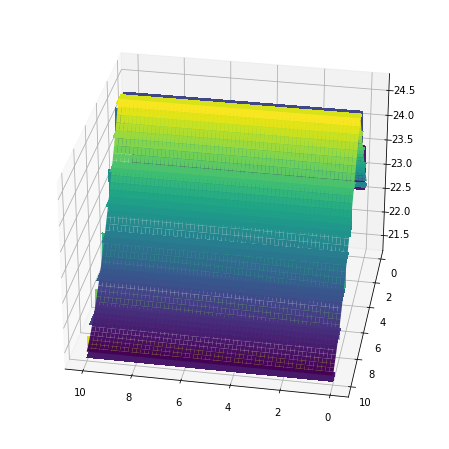

In [16]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

setpoint = np.linspace(18,30,61) # chia khoang 0-10 thanhf 61 phaanf thuw
val_sensor= np.linspace(-5,60,61)
pwm= np.linspace(0,255,61)

setpoint= ctrl.Antecedent(setpoint,'setpoint')
val_sensor= ctrl.Antecedent(val_sensor,'val_sensor')


pwm = ctrl.Consequent(pwm,'pwm')


names1 = ['RT','T','AV','C','RC']    # gia tri phai laf ler 




setpoint.automf(names=names1) # chia khoan cho tung bieeur ddofo teen dg bieu do
val_sensor.automf(names=names1)
pwm.automf(names=names1)

setpoint.view()
val_sensor.view()
pwm.view()


rule0 = ctrl.Rule(antecedent=((setpoint['RT']&val_sensor['RT'])|(setpoint['T']&val_sensor['RT'])|(setpoint['RT']&val_sensor['T'])
),consequent=pwm['RT'], label= 'rule RT')

rule1 = ctrl.Rule(antecedent=((setpoint['AV']&val_sensor['RT'])|(setpoint['AV']&val_sensor['T'])|(setpoint['T']&val_sensor['T'])|(setpoint['RT']&val_sensor['AV'])|(setpoint['T']&val_sensor['AV'])
|(setpoint['T']&val_sensor['C'])),consequent=pwm['T'], label= 'rule T')

rule2 = ctrl.Rule(antecedent=((setpoint['C']&val_sensor['RT'])|(setpoint['C']&val_sensor['T'])|(setpoint['RC']&val_sensor['T'])|(setpoint['AV']&val_sensor['AV'])|(setpoint['RT']&val_sensor['C'])
|(setpoint['AV']&val_sensor['C'])|(setpoint['RT']&val_sensor['RC'])),consequent=pwm['AV'], label= 'rule AV')

rule3 = ctrl.Rule(antecedent=((setpoint['RC']&val_sensor['RT'])|(setpoint['C']&val_sensor['AV'])|(setpoint['RC']&val_sensor['AV'])|(setpoint['C']&val_sensor['C'])|(setpoint['RT']&val_sensor['C'])
|(setpoint['T']&val_sensor['RC'])|(setpoint['AV']&val_sensor['RC'])),consequent=pwm['C'], label= 'rule C')

rule4 = ctrl.Rule(antecedent=((setpoint['RC']&val_sensor['C'])|(setpoint['RC']&val_sensor['RC'])|(setpoint['C']&val_sensor['RC'])
),consequent=pwm['RC'], label= 'rule RC')

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])


sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['setpoint'] = x[i,j]
    sim.input['val_sensor'] = y[i,j]
    
    sim.compute()
    z[i,j] = sim.output['pwm']
    
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,100)

